<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -U imbalanced-learn

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# LInk da URL do arquivo
data_URL= "https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets"
#Ou
D_G = "https://github.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/blob/main/Dados/Customer-Churn.csv"

In [9]:
dados = pd.read_csv('/content/sample_data/Customer-Churn.csv')

In [10]:
dados.shape

(7043, 18)

In [11]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [12]:
#modificacao de forma manual

trad_dic = {
    'Sim': 1,
    'Nao': 0
    }
mod_data = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(trad_dic)
mod_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [13]:
#Get Dummies
dummie_dado = pd.get_dummies(dados.drop(['Conjuge','Dependentes', 'TelefoneFixo','PagamentoOnline', 'Churn'], axis=1))

#Juncao Dos dados transformados com os que ja tinha
dados_final = pd.concat([mod_data, dummie_dado], axis=1)

In [14]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [15]:
dados_final.shape

(7043, 39)

In [16]:
pd.set_option('display.max_columns', 39)

In [17]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


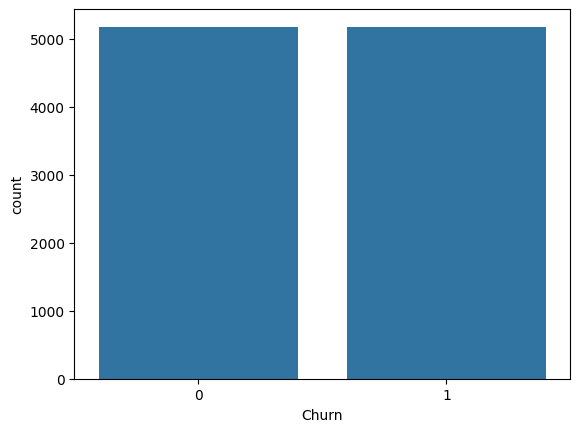

In [41]:
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [19]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [20]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [21]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


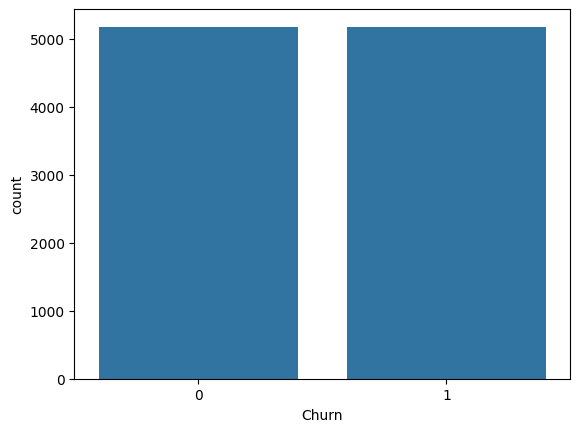

In [22]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [23]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


In [24]:
dados_final.Churn.value_counts()


0    5174
1    5174
Name: Churn, dtype: int64

In [26]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

In [27]:
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [29]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

### Calculo de Distancia Euclidiana


In [32]:
a = Xmaria_normalizado

In [34]:
b = X_normalizado[0]

In [35]:
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.0150895 , -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03429166,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [36]:
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.06058568e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13834258e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [39]:
np.sum(np.square(a-b))

91.7112036526817

In [38]:
np.sqrt(91.7112036526817)

9.576596663360199

### Implementando o Modelo e Treinando


In [42]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.3, random_state = 123)

#### Treino & Teste


In [44]:
knn = KNeighborsClassifier(metric='euclidean')

In [45]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [47]:
predito_knn = knn.predict(X_teste)

In [48]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

### Metodo Probabilistico
#### Naive Bayes  com Modelo Bernoulli Naive Bayes

##### Treinamento e Teste

In [49]:
from sklearn.naive_bayes import BernoulliNB


In [63]:
bnb = BernoulliNB(binarize=0.44)


In [59]:
np.median(X_treino)


-0.4461759755508453

In [61]:
X_treino

array([[-0.79024667, -0.52771004, -3.06083934, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ]])

In [53]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [64]:
bnb.fit(X_treino, y_treino)


BernoulliNB(binarize=0.44)

In [65]:
predito_BNb = bnb.predict(X_teste)


In [66]:
predito_BNb


array([1, 0, 0, ..., 1, 1, 1])